<a href="https://colab.research.google.com/github/mens0n/COVID-19-data-analysis-Seoul--ML-/blob/main/COVID_19_data_analysis(Seoul).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Business Understanding
#### 프로젝트 개요
- 2020년 초에 발생한 코로나19 바이러스는 세계적으로 대유향하였고 이에 대한 많은 분석이 이루어지고 있다. 유행 초기엔 이를 분석할 데이터가 충분하지 않았지만 지금은 다양한 데이터 기관에서 코로나 관련 데이터를 공공으로 제공하고 있다.

- 국내 공공데이터 포털에서 제공하는 서울시 코로나19 확진자 현황 데이터를 바탕으로 탐색적 데이터 분석을 수행한다. 국내 데이터 중 확진자 비율이 제일 높고 사람이 제일 많은 서울시의 데이터를 선정하였다.

#### 프로젝트 목표
- 서울시 코로나19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 사용

# 2.Data Understanding

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 서울특별시 코로나19 자치구별 확진자 발생동향.csv to 서울특별시 코로나19 자치구별 확진자 발생동향 (1).csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding= 'cp949')
df.head().T

,0,1,2,3,4
자치구 기준일,2022.01.18.00,2022.01.17.00,2022.01.16.00,2022.01.15.00,2022.01.14.00
종로구 전체,4260,4250,4237,4232,4215
종로구 추가,10,13,6,17,9
중구 전체,3990,3980,3963,3950,3929
중구 추가,10,17,14,21,23
용산구 전체,5819,5794,5762,5730,5696
용산구 추가,25,32,32,34,30
성동구 전체,6172,6156,6142,6116,6086
성동구 추가,16,14,26,30,27
광진구 전체,7628,7589,7567,7535,7500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구 기준일  715 non-null    object
 1   종로구 전체   715 non-null    int64 
 2   종로구 추가   715 non-null    int64 
 3   중구 전체    715 non-null    int64 
 4   중구 추가    715 non-null    int64 
 5   용산구 전체   715 non-null    int64 
 6   용산구 추가   715 non-null    int64 
 7   성동구 전체   715 non-null    int64 
 8   성동구 추가   715 non-null    int64 
 9   광진구 전체   715 non-null    int64 
 10  광진구 추가   715 non-null    int64 
 11  동대문구 전체  715 non-null    int64 
 12  동대문구 추가  715 non-null    int64 
 13  중랑구 전체   715 non-null    int64 
 14  중랑구 추가   715 non-null    int64 
 15  성북구 전체   715 non-null    int64 
 16  성북구 추가   715 non-null    int64 
 17  강북구 전체   715 non-null    int64 
 18  강북구 추가   715 non-null    int64 
 19  도봉구 전체   715 non-null    int64 
 20  도봉구 추가   715 non-null    int64 
 21  노원구 전체   715 non-null    int64 
 22  노원

In [5]:
# 시작일 확인
df.tail()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,광진구 추가,동대문구 전체,동대문구 추가,중랑구 전체,중랑구 추가,성북구 전체,성북구 추가,강북구 전체,강북구 추가,도봉구 전체,도봉구 추가,노원구 전체,노원구 추가,은평구 전체,은평구 추가,서대문구 전체,서대문구 추가,마포구 전체,마포구 추가,양천구 전체,양천구 추가,강서구 전체,강서구 추가,구로구 전체,구로구 추가,금천구 전체,금천구 추가,영등포구 전체,영등포구 추가,동작구 전체,동작구 추가,관악구 전체,관악구 추가,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
710,20.02.09.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
711,20.02.08.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
712,20.02.07.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
713,20.02.06.10,3,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1
714,20.02.05.10,3,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


In [6]:
df.describe()

,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,광진구 추가,동대문구 전체,동대문구 추가,중랑구 전체,중랑구 추가,성북구 전체,성북구 추가,강북구 전체,강북구 추가,도봉구 전체,도봉구 추가,노원구 전체,노원구 추가,은평구 전체,은평구 추가,서대문구 전체,서대문구 추가,마포구 전체,마포구 추가,양천구 전체,양천구 추가,강서구 전체,강서구 추가,구로구 전체,구로구 추가,금천구 전체,금천구 추가,영등포구 전체,영등포구 추가,동작구 전체,동작구 추가,관악구 전체,관악구 추가,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,770.800000,5.979021,712.706294,5.847552,1144.990210,8.163636,1189.117483,8.629371,1406.548252,10.779021,1667.569231,14.179021,1712.986014,12.813986,1813.742657,14.232168,1226.254545,9.984615,1276.349650,10.191608,1872.155245,14.699301,1883.576224,14.395804,1171.165035,9.311888,1531.560839,11.518881,1528.324476,12.190210,2109.904895,15.619580,1873.872727,16.197203,950.304895,8.721678,1916.545455,15.616783,1802.226573,13.033566,2277.216783,16.998601,1788.886713,12.748252,2670.068531,19.121678,2668.872727,20.555245,1725.090909,13.896503,3535.914685,25.474126
std,1016.510521,10.180767,978.760601,9.122139,1441.224175,11.948996,1533.819005,12.810884,1889.251829,16.351920,2351.243477,24.994372,2183.459158,21.426712,2376.894517,23.715029,1682.794018,17.319086,1660.742404,18.472432,2424.923616,25.207329,2480.298856,23.947158,1568.749508,15.841541,2013.961077,17.711764,2005.680037,21.181162,2624.606764,26.824842,2784.425992,26.654055,1470.078971,15.831289,2733.820124,25.013526,2299.498139,20.444815,2969.646607,26.197991,2235.109181,19.148128,3497.867944,26.703330,3552.575847,32.666393,2380.020384,22.788159,4243.235555,53.096607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.500000,0.000000,20.000000,0.000000,54.000000,0.000000,57.000000,0.000000,22.000000,0.000000,44.000000,0.000000,44.000000,0.000000,42.000000,0.000000,28.000000,0.000000,64.000000,0.000000,50.000000,1.000000,64.000000,1.000000,41.000000,0.000000,53.000000,0.000000,71.500000,0.000000,104.000000,1.000000,91.000000,0.000000,39.000000,0.000000,70.000000,0.000000,70.000000,1.000000,144.000000,1.000000,64.000000,1.000000,98.000000,1.000000,99.000000,1.000000,49.000000,0.000000,94.000000,1.000000
50%,510.000000,2.000000,342.000000,2.000000,507.000000,4.000000,566.000000,4.000000,571.000000,5.000000,828.000000,5.000000,981.000000,5.000000,991.000000,6.000000,612.000000,3.000000,719.000000,4.000000,1001.000000,7.000000,960.000000,6.000000,648.000000,3.000000,837.000000,4.000000,935.000000,4.000000,1536.000000,5.000000,783.000000,4.000000,386.000000,2.000000,857.000000,5.000000,991.000000,5.000000,1156.000000,6.000000,952.000000,6.000000,1128.000000,8.000000,1332.000000,8.000000,739.000000,5.000000,2825.000000,8.000000
75%,978.500000,7.000000,888.500000,7.000000,1792.500000,10.000000,1833.000000,11.000000,2022.000000,14.000000,2124.500000,14.000000,2468.500000,16.000000,2445.000000,16.000000,1688.500000,11.500000,1810.500000,11.000000,2720.000000,16.000000,2528.500000,16.500000,1528.000000,11.000000,2143.500000,16.500000,2021.500000,14.000000,2834.000000,19.000000,2040.000000,19.000000,1044.500000,10.000000,2352.000000,20.0

In [7]:
df.columns

Index(['자치구 기준일', '종로구 전체', '종로구 추가', '중구 전체', '중구 추가', '용산구 전체', '용산구 추가',
       '성동구 전체', '성동구 추가', '광진구 전체', '광진구 추가', '동대문구 전체', '동대문구 추가', '중랑구 전체',
       '중랑구 추가', '성북구 전체', '성북구 추가', '강북구 전체', '강북구 추가', '도봉구 전체', '도봉구 추가',
       '노원구 전체', '노원구 추가', '은평구 전체', '은평구 추가', '서대문구 전체', '서대문구 추가', '마포구 전체',
       '마포구 추가', '양천구 전체', '양천구 추가', '강서구 전체', '강서구 추가', '구로구 전체', '구로구 추가',
       '금천구 전체', '금천구 추가', '영등포구 전체', '영등포구 추가', '동작구 전체', '동작구 추가', '관악구 전체',
       '관악구 추가', '서초구 전체', '서추구 추가', '강남구 전체', '강남구 추가', '송파구 전체', '송파구 추가',
       '강동구 전체', '강동구 추가', '기타 전체', '기타 추가'],
      dtype='object')

In [8]:
# 컬럼이름 오타 변경
df = df.rename(columns={'서추구 추가':'서초구 추가'})
set(df)

{'강남구 전체',
 '강남구 추가',
 '강동구 전체',
 '강동구 추가',
 '강북구 전체',
 '강북구 추가',
 '강서구 전체',
 '강서구 추가',
 '관악구 전체',
 '관악구 추가',
 '광진구 전체',
 '광진구 추가',
 '구로구 전체',
 '구로구 추가',
 '금천구 전체',
 '금천구 추가',
 '기타 전체',
 '기타 추가',
 '노원구 전체',
 '노원구 추가',
 '도봉구 전체',
 '도봉구 추가',
 '동대문구 전체',
 '동대문구 추가',
 '동작구 전체',
 '동작구 추가',
 '마포구 전체',
 '마포구 추가',
 '서대문구 전체',
 '서대문구 추가',
 '서초구 전체',
 '서초구 추가',
 '성동구 전체',
 '성동구 추가',
 '성북구 전체',
 '성북구 추가',
 '송파구 전체',
 '송파구 추가',
 '양천구 전체',
 '양천구 추가',
 '영등포구 전체',
 '영등포구 추가',
 '용산구 전체',
 '용산구 추가',
 '은평구 전체',
 '은평구 추가',
 '자치구 기준일',
 '종로구 전체',
 '종로구 추가',
 '중구 전체',
 '중구 추가',
 '중랑구 전체',
 '중랑구 추가'}

In [9]:
area = ['종로구', '중구', '용산구',
       '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구',
       '강동구', '기타']

## 3.데이터 시각화

### 자치구 기준일 데이터 전처리
- 확진일 데이터를 *년, 월, 일 형태*의 날짜 형식임을 확인했으니, 연별, 월별, 일별 분석을 위해 문자열 형식의 데이터를 나누어 숫자형 데이터로 변환

In [10]:
df['자치구 기준일']

0      2022.01.18.00
1      2022.01.17.00
2      2022.01.16.00
3      2022.01.15.00
4      2022.01.14.00
           ...      
710      20.02.09.10
711      20.02.08.10
712      20.02.07.10
713      20.02.06.10
714      20.02.05.10
Name: 자치구 기준일, Length: 715, dtype: object

기준일 데이터를 year, month, day데이터로 나누기

In [11]:
df['year'] = df['자치구 기준일'].apply(lambda x:int(x.split('.')[0]))
df['month'] = df['자치구 기준일'].apply(lambda x:int(x.split('.')[1]))
df['day'] = df['자치구 기준일'].apply(lambda x:int(x.split('.')[2]))
df.head().T

,0,1,2,3,4
자치구 기준일,2022.01.18.00,2022.01.17.00,2022.01.16.00,2022.01.15.00,2022.01.14.00
종로구 전체,4260,4250,4237,4232,4215
종로구 추가,10,13,6,17,9
중구 전체,3990,3980,3963,3950,3929
중구 추가,10,17,14,21,23
용산구 전체,5819,5794,5762,5730,5696
용산구 추가,25,32,32,34,30
성동구 전체,6172,6156,6142,6116,6086
성동구 추가,16,14,26,30,27
광진구 전체,7628,7589,7567,7535,7500


In [12]:
set(df['year'])
# 20은 2020을 나타냄으로 바꿔준다

{20, 2020, 2021, 2022}

In [13]:
df.loc[df['year'] == 20,['year']] = 2020
set(df['year'])

{2020, 2021, 2022}

In [14]:
# 이상치 변경
df['자치구 기준일'] = df['자치구 기준일'].str.replace('20.02','2020.02')
df['자치구 기준일'] = df['자치구 기준일'].str.replace('202020.02','2020.02')
df['자치구 기준일'].tail().T

710    2020.02.09.10
711    2020.02.08.10
712    2020.02.07.10
713    2020.02.06.10
714    2020.02.05.10
Name: 자치구 기준일, dtype: object

In [15]:
# 요일 입력 (0(월)~6(일))
parsed = pd.to_datetime(df['자치구 기준일'])
parsed
df['dayofweek'] = parsed.apply(lambda x:pd.to_datetime(x).dayofweek)
df.tail().T

,710,711,712,713,714
자치구 기준일,2020.02.09.10,2020.02.08.10,2020.02.07.10,2020.02.06.10,2020.02.05.10
종로구 전체,0,0,0,3,3
종로구 추가,0,0,0,0,0
중구 전체,0,0,0,0,0
중구 추가,0,0,0,0,0
용산구 전체,0,0,0,0,0
용산구 추가,0,0,0,0,0
성동구 전체,0,0,0,0,0
성동구 추가,0,0,0,0,0
광진구 전체,0,0,0,0,0


### 월별 확진자 수 출력
- 나누어진 month의 데이터를 바탕으로 달별 확진자 수를 막대 그래프로 출력

In [16]:
tem_day = 0
for i in range(len(area)):
    tem_day += df[area[i]+' 추가']
df['day_raise'] = tem_day

tem_total = 0
for i in range(len(area)):
  tem_total += df[area[i]+' 전체']
df['total_raise'] = tem_total
df.tail(20).T
# 아래 데이터에서 2월초 데이터는 오류가 많은것으로 추정된다, 하지만 숫자가 영향이 크지 않아 정제하지 않고 그대로 진행한다.

,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714
자치구 기준일,2020.02.24.10,2020.02.23.10,2020.02.22.10,2020.02.21.10,2020.02.20.10,2020.02.19.10,2020.02.18.10,2020.02.17.10,2020.02.16.10,2020.02.15.10,2020.02.14.10,2020.02.13.10,2020.02.12.10,2020.02.11.10,2020.02.10.10,2020.02.09.10,2020.02.08.10,2020.02.07.10,2020.02.06.10,2020.02.05.10
종로구 전체,9,9,8,8,8,0,0,0,5,0,0,0,0,0,0,0,0,0,3,3
종로구 추가,0,1,0,3,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
중구 전체,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
중구 추가,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
용산구 전체,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
용산구 추가,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
성동구 전체,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
성동구 추가,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
광진구 전체,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# 월별 확진자 수
important = df.groupby('month').agg({'day_raise':np.sum})
important

,day_raise
month,
1,23265
2,4155
3,4173
4,5989
5,6531
6,6559
7,14665
8,17333
9,22527


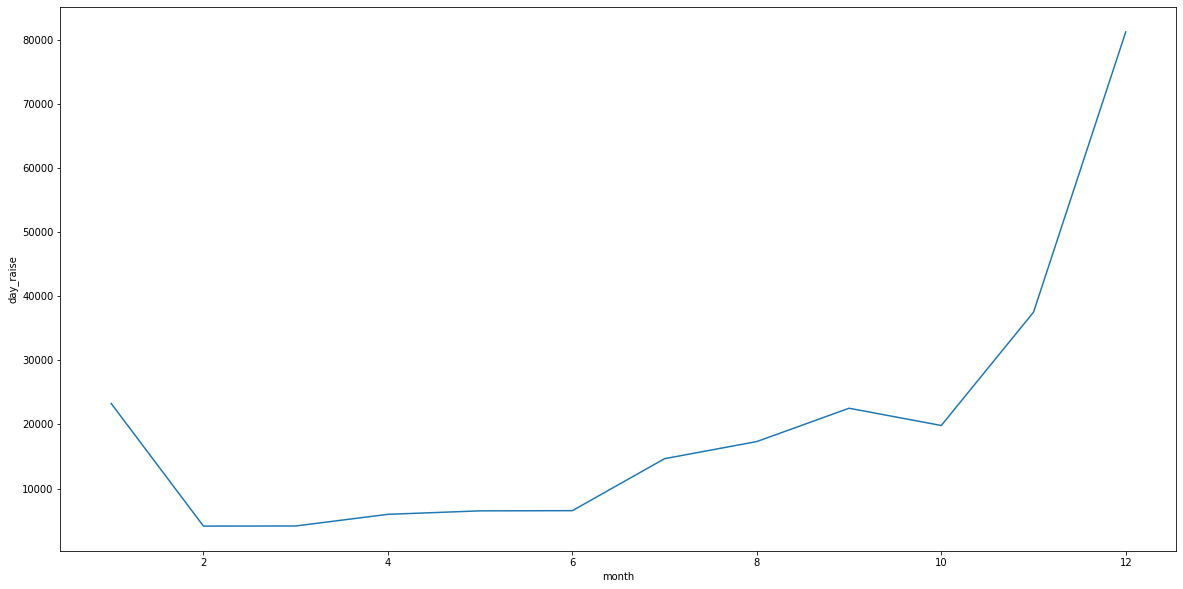

In [18]:
plt.figure(figsize = (20,10))
sns.lineplot(data = important, x = 'month', y = 'day_raise')

# 그래프를 통해 월말 연초에 코로나 확진자 수가 확실히 많다는 것을 알수 있습니다

### 초기부터 지금까지의 확진자 추이

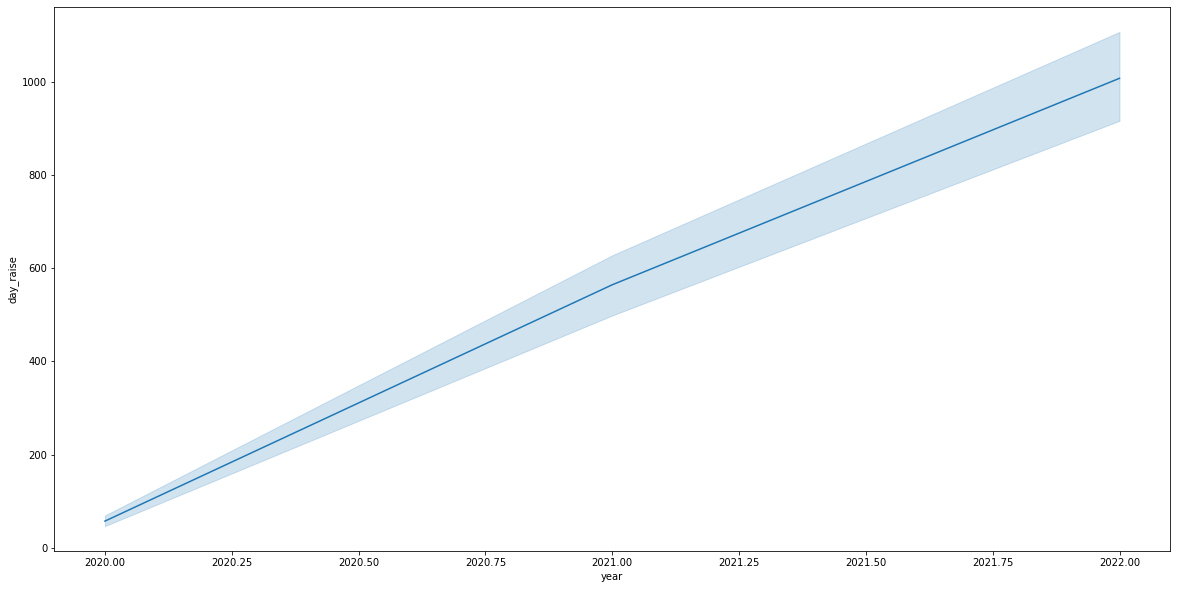

In [19]:
# 확진 초기부터의 추이선
plt.figure(figsize = (20,10))
sns.lineplot(data = df, x = 'year',y = 'day_raise')

# 하루 확진자 수가 계속해서 늘고있다

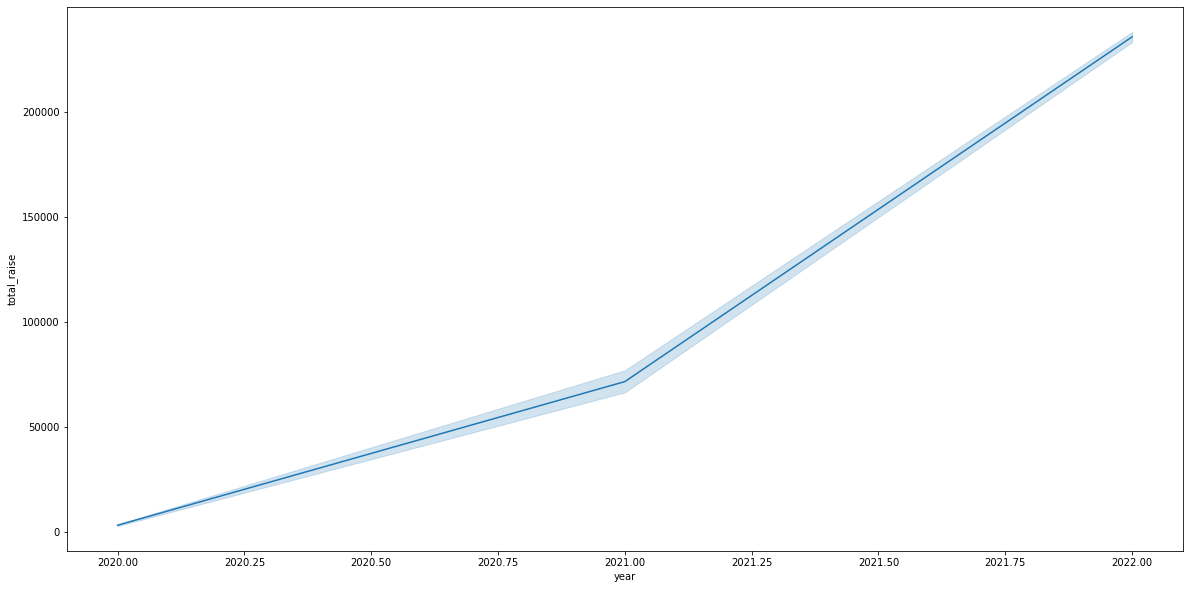

In [20]:
# 확진자가 늘어나는 속도
plt.figure(figsize = (20,10))
sns.lineplot(data = df, x = 'year', y = 'total_raise')
# 2021년에 들어오고 나서 확진자가 느는 속도가 빨라졌다

### 현재까지의 지역별 확진자

In [21]:
# 지역 DataFrame 생성
important = ['종로구 전체', '중구 전체', '용산구 전체',
       '성동구 전체', '광진구 전체', '동대문구 전체', '중랑구 전체', '성북구 전체', '강북구 전체', '도봉구 전체',
       '노원구 전체', '은평구 전체', '서대문구 전체', '마포구 전체', '양천구 전체', '강서구 전체', '구로구 전체',
       '금천구 전체', '영등포구 전체', '동작구 전체', '관악구 전체', '서초구 전체', '강남구 전체', '송파구 전체',
       '강동구 전체', '기타 전체']
last_day = df.groupby(important).agg({'total_raise':np.sum})[-1:].reset_index()
a = list(np.array(last_day.columns))
b = list(np.array(last_day).tolist())

df_ld = pd.DataFrame(a,b).reset_index()
df_ld.columns = ['Gu', 'Tot']
df_ld = df_ld[:26]
df_ld

,Gu,Tot
0,4260,종로구 전체
1,3990,중구 전체
2,5819,용산구 전체
3,6172,성동구 전체
4,7628,광진구 전체
5,10116,동대문구 전체
6,9164,중랑구 전체
7,10209,성북구 전체
8,7148,강북구 전체
9,7203,도봉구 전체


### Colab Matplotlib에서 한글 폰트 사용하기
###### 참고
- 링크:https://programmers.co.kr/learn/courses/21/lessons/950

In [22]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm

# 버전과 위치정보를 알아두기
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

# 시스템에 설치된 폰트 확인
sys_font = fm.findSystemFonts()
print(f'sys_font number : {len(sys_font)}')
print(sys_font)
# 나눔폰트 유무 확인
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f'nanum_font number : {len(nanum_font)}')

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib
sys_font number : 48
['/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoB

In [23]:
# 나눔고딕 install
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [24]:
# 다운로드 받은 갯수 다시 체크
# 나눔폰트 유무 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

# 설치된 나눔폰트의 전체 경로 보기
print(nanum_font)

sys_font number: 48
nanum_font number: 31
['/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanu

In [25]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보기(python 3.6이상 사용가능)
!python --__version__
def current_font():
  print(f"설정 폰트 글꼴 : {plt.rcParams['font.family']}, 설정 폰트 사이즈 : {plt.rcParams['font.size']}")
current_font()

unknown option --__version__
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
설정 폰트 글꼴 : ['sans-serif'], 설정 폰트 사이즈 : 10.0


In [26]:
# 한글 출력을 위해 폰트 옵션을 설정한다
import matplotlib.font_manager as fm
# 위 경로중 원하는 글꼴 경로를 가져온다
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumGothic


In [27]:
fm._rebuild()

2번 방법:

In [28]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [29]:
plt.rc('font', family = 'NanumBarunGothic')


**- 폰트 설정후에는 런타임 재시작을 해야한다**

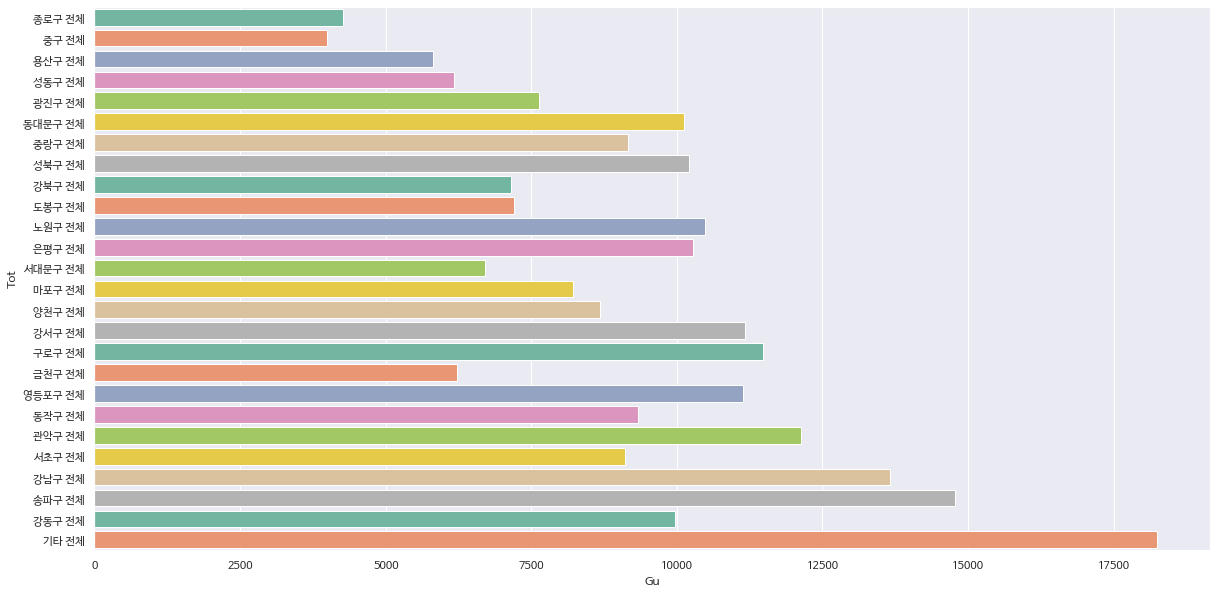

In [30]:
plt.figure(figsize=(20,10))
sns.set(font = 'NanumBarunGothic',
        rc = {"axes.unicode_minus":False},
        style = 'darkgrid')
sns.barplot(data = df_ld, x = 'Gu', y = 'Tot', palette='Set2')

### 월별 강서구 확진자 수 출력

In [31]:
# 월별 강서구 코로나 증가
df_gs = df.groupby('month').agg({'강서구 추가':np.sum}).reset_index()

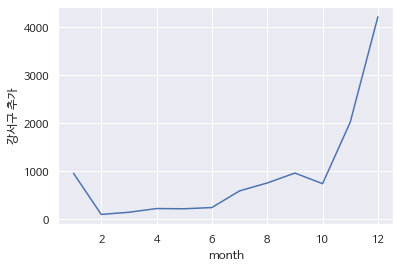

In [32]:
sns.lineplot(data = df_gs, x = 'month', y = '강서구 추가')

### 서울 지역에서 확지자를 지도에 출력
- 지도를 출력하기 위한 라이브러리로 folium을 사용

In [33]:
import folium
# 서울시 좌표를 입력해 Map함수를 사용하여 지도를 출력합니다(zoom_start는 크면 클수록 시작 지도가 가깝게 보임)
map_osm = folium.Map(location = [37.529622, 126.984307], zoom_start = 12)
map_osm

- 지역마다 지도에 정보를 출력하기 위해서는 각 지역의 좌표정보가 필요
- 이를 해결하기 위해서 서울시 행정구역 시군 정보 데이터를 불러와 사용함
- 데이터 출처 : https://data.seoul.go.kr/index.do

In [34]:
uploaded2 = files.upload()

Saving 서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv to 서울시 행정구역 시군구 정보 (좌표계_ WGS1984) (1).csv


In [35]:
df2 = pd.read_csv('서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv')
df2

,Unnamed: 0,순번,시순구코드,시군구명_한글,시군구명_영어,위도,경도
0,0,1,11320,도봉구,Dobong-gu,37.665861,127.031767
1,1,2,11380,은평구,Eunpyeong-gu,37.617612,126.922700
2,2,3,11230,동대문구,Dongdaemun-gu,37.583801,127.050700
3,3,4,11590,동작구,Dongjak-gu,37.496504,126.944307
4,4,5,11545,금천구,Geumcheon-gu,37.460097,126.900155
5,5,6,11530,구로구,Guro-gu,37.495486,126.858121
6,6,7,11110,종로구,Jongno-gu,37.599100,126.986149
7,7,8,11305,강북구,Gangbuk-gu,37.646995,127.014716
8,8,9,11260,중랑구,Jungnang-gu,37.595379,127.093967
9,9,10,11680,강남구,Gangnam-gu,37.495985,127.066409


In [36]:
df2 = df2.drop(columns = ['Unnamed: 0'])
df2[df2['시군구명_한글'] == '중구']

,순번,시순구코드,시군구명_한글,시군구명_영어,위도,경도
11,12,11140,중구,Jung-gu,37.557945,126.99419


In [37]:
df2.columns

Index(['순번', '시순구코드', '시군구명_한글', '시군구명_영어', '위도', '경도'], dtype='object')

for문을 사용하여 지역마다 확진자를 원형 마커를 사용해 지도에 출력

In [38]:
# df_ld데이터프레임 안에 기타지역을 제거해 준다
df_ld_clear = df_ld[:25]
df_ld_clear

,Gu,Tot
0,4260,종로구 전체
1,3990,중구 전체
2,5819,용산구 전체
3,6172,성동구 전체
4,7628,광진구 전체
5,10116,동대문구 전체
6,9164,중랑구 전체
7,10209,성북구 전체
8,7148,강북구 전체
9,7203,도봉구 전체


In [39]:
df_area_list = df_ld_clear['Tot'].apply(lambda x:x.split(' ')[0])
df_ld_clear['area'] = df_area_list
df_ld_clear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gu,Tot,area
0,4260,종로구 전체,종로구
1,3990,중구 전체,중구
2,5819,용산구 전체,용산구
3,6172,성동구 전체,성동구
4,7628,광진구 전체,광진구
5,10116,동대문구 전체,동대문구
6,9164,중랑구 전체,중랑구
7,10209,성북구 전체,성북구
8,7148,강북구 전체,강북구
9,7203,도봉구 전체,도봉구


In [56]:
# 서울 중심지 중구를 가운데 좌표로 잡아 지도를 출력합니다.
map_osm = folium.Map(location = [37.557945, 126.99419], zoom_start= 12)

# 지역 정보를 set 함수를 사용하여 25개 고유의 지역을 뽑아냅니다.
for region in set(df_ld_clear['area']):
 # 해당 지역의 데이터 개수를 count에 저장합니다.
 count = df_ld_clear['Gu'][df_ld_clear['area']==region]
 # 해당 지역의 데이터를 CRS에서 뽑아냅니다.
 df2_region = df2[df2['시군구명_한글'] == region]
  # 위도 설정
 latitude = float(df2_region['위도'])
 # 경도 설정
 longitude = float(df2_region['경도'])

 # CircleMarker를 사용하여 지역마다 원형마커를 생성합니다.
 marker = folium.CircleMarker([latitude, longitude],    # 위치
                              radius = int(count/100-30),       # 범위
                              color = '#3186cc',            # 선 색상
                              fill_color = '#3186cc',       # 면 색상
                              popup = ' '.join((region, str(count), '명')))   # 팝업 설정
 # 생성한 원형마커를 지도에 추가합니다.
 marker.add_to(map_osm)
 print(latitude)
 print(longitude)
 print(int(count/100-30))
map_osm

37.548144
127.085753
46
37.527062
126.856153
56
37.582037
126.935666
37
37.606991
127.023218
72
37.562290999999995
126.90878000000001
52
37.550675
127.04096200000001
31
37.665861
127.03176699999999
42
37.495486
126.858121
84
37.549208
127.146482
69
37.460097
126.900155
32
37.557945000000004
126.99418999999999
9
37.565762
126.82265600000001
81
37.520641
126.913924
81
37.496503999999995
126.94430700000001
63
37.617612
126.9227
72
37.465399
126.943807
91
37.655264
127.07712
74
37.531101
126.98107399999999
28
37.595379
127.09396699999999
61
37.504853000000004
127.11448200000001
117
37.583801
127.0507
71
37.476953
127.03781000000001
61
37.646995000000004
127.01471599999999
41
37.5991
126.986149
12
37.495985
127.06640900000001
106


In [41]:
 # 위도 설정
 latitude = "%0.6f" %float(df2_region['위도'])
 # 경도 설정
 longitude = "%0.6f" %float(df2_region['경도'])

 count = df_ld_clear['Gu'][df_ld_clear['area']=='중구']

 print(format(latitude,'.2f'))
 print(format(longitude,'.2f'))
 
 print(count)

TypeError: ignored

In [ ]:
df2

In [ ]:
a = 0.2
print(format(a,".2f"))
print(type(a))